In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

# Preprocessing

In [2]:
dr_x_full = xr.open_dataarray('./train_X.nc')
dr_x_full

<xarray.DataArray 'data' (sample: 57852486, var: 88)>
[5091018768 values with dtype=float64]
Coordinates:
  * var      (var) object 'I' 'J' 'L' 'TEMP' 'PRESS' 'NUMDEN' 'H2O' 'JV1' ...
  * sample   (sample) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [3]:
dr_y_full = xr.open_dataarray('./train_Y.nc')
dr_y_full

<xarray.DataArray 'data' (sample: 57852486, var: 55)>
[3181886730 values with dtype=float64]
Coordinates:
  * var      (var) object 'NO' 'O3' 'PAN' 'CO' 'ALK4' 'ISOP' 'HNO3' 'H2O2' ...
  * sample   (sample) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [4]:
# get a subset
# just experimenting, so don't read all the 60GB data
subset_index = slice(0, 1000000)
dr_x = dr_x_full.isel(sample=subset_index)
dr_y = dr_y_full.isel(sample=subset_index)

dr_x.nbytes / 1e9, dr_y.nbytes / 1e9 # size in GB

(0.704, 0.44)

In [5]:
# convert xarray DataArray to pandas dataframe
df_x = dr_x.to_pandas()
df_x.drop(['I', 'J', 'L'], axis=1, inplace=True)
df_x.head()

var,TEMP,PRESS,NUMDEN,H2O,JV1,JV2,JV3,JV4,JV5,JV6,...,GLYC,MVKN,MACRN,RIP,IEPOX,MAP,NO2,NO3,HNO2,CH4
sample,,,,,,,,,,,,,,,,,,,,,
1,235.649994,699.340027,2.149000e+19,4.388300e+15,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,...,3657100.0,384960.0,18023.000000,126330.0,2135200.0,150790000.0,2447100.0,572.570007,287590.0,3.794400e+13
2,237.779999,663.900024,2.021800e+19,5.046400e+15,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,...,4072600.0,459270.0,20907.000000,133940.0,2258400.0,145560000.0,5122700.0,1776.400024,616240.0,3.569700e+13
3,245.339996,865.609985,2.554300e+19,1.376300e+16,9.449700e-30,0.000028,3.341500e-10,0.0,0.0,0.0,...,5767600.0,803700.0,33243.000000,173580.0,2650700.0,153570000.0,17193000.0,14000.000000,1511300.0,4.510100e+13
4,228.240005,425.459991,1.349100e+19,2.048500e+14,1.069500e-22,0.000166,1.019900e-11,0.0,0.0,0.0,...,4622400.0,455790.0,4241.100098,205880.0,3285900.0,135920000.0,14513000.0,6620.799805,46879.0,2.382100e+13
5,249.279999,920.179993,2.672300e+19,1.908400e+16,4.775200e-30,0.000084,1.069300e-09,0.0,0.0,0.0,...,3875300.0,515530.0,19379.000000,102320.0,1660900.0,150530000.0,4876200.0,6205.600098,458890.0,4.718400e+13


In [6]:
df_x.columns

Index(['TEMP', 'PRESS', 'NUMDEN', 'H2O', 'JV1', 'JV2', 'JV3', 'JV4', 'JV5',
       'JV6', 'JV7', 'JV8', 'JV9', 'JV10', 'JV11', 'JV12', 'NO', 'O3', 'PAN',
       'CO', 'ALK4', 'ISOP', 'HNO3', 'H2O2', 'ACET', 'MEK', 'ALD2', 'RCHO',
       'MVK', 'MACR', 'PMN', 'PPN', 'R4N2', 'PRPE', 'C3H8', 'CH2O', 'C2H6',
       'N2O5', 'HNO4', 'MP', 'DMS', 'SO2', 'SO4', 'SO4s', 'MSA', 'NH3', 'NH4',
       'NIT', 'NITs', 'BCPI', 'OCPI', 'BCPO', 'OCPO', 'DST1', 'DST2', 'DST3',
       'DST4', 'SALA', 'SALC', 'Br2', 'Br', 'BrO', 'HOBr', 'HBr', 'BrNO2',
       'BrNO3', 'CHBr3', 'CH2Br2', 'CH3Br', 'MPN', 'ISOPND', 'ISOPNB', 'MOBA',
       'PROPNN', 'HAC', 'GLYC', 'MVKN', 'MACRN', 'RIP', 'IEPOX', 'MAP', 'NO2',
       'NO3', 'HNO2', 'CH4'],
      dtype='object', name='var')

In [7]:
df_y = dr_y.to_pandas()
df_y.head()

var,NO,O3,PAN,CO,ALK4,ISOP,HNO3,H2O2,ACET,MEK,...,MVKN,MACRN,RIP,IEPOX,MAP,NO2,NO3,HNO2,HO2,OH
sample,,,,,,,,,,,,,,,,,,,,,
1,1.0,5.960400e+11,174490000.0,1.492900e+12,1.081700e+09,36271.000000,28518.0,8.904100e+08,5.898300e+09,247590000.0,...,384960.0,18023.000000,126320.0,2135200.0,150790000.0,2393400.0,714.140015,287820.0,28505.0,37.375999
2,1.0,5.873300e+11,182140000.0,1.407500e+12,1.079700e+09,39870.000000,61868.0,8.449100e+08,5.424200e+09,241690000.0,...,459270.0,20907.000000,133940.0,2258400.0,145560000.0,5023100.0,1775.699951,616850.0,27071.0,39.639999
3,1389200.0,6.997100e+11,280329984.0,1.794500e+12,1.827100e+09,94271.000000,3104800.0,8.519200e+08,6.543400e+09,369110016.0,...,803390.0,33113.000000,172960.0,2649900.0,153590000.0,13766000.0,12886.000000,1108900.0,5731800.0,15475.000000
4,3308000.0,6.793600e+11,401910016.0,9.184300e+11,4.638500e+08,5007.799805,720129984.0,1.989900e+09,5.267000e+09,136790000.0,...,455150.0,4197.799805,202220.0,3284100.0,135880000.0,15090000.0,7687.100098,33241.0,7166100.0,41420.000000
5,597180.0,7.277600e+11,207420000.0,1.875400e+12,1.589700e+09,62215.000000,1630700.0,6.895500e+08,5.534400e+09,345449984.0,...,515030.0,19260.000000,101750.0,1660000.0,150510000.0,3584400.0,4519.500000,245020.0,7377700.0,24548.000000


In [8]:
df_y.columns

Index(['NO', 'O3', 'PAN', 'CO', 'ALK4', 'ISOP', 'HNO3', 'H2O2', 'ACET', 'MEK',
       'ALD2', 'RCHO', 'MVK', 'MACR', 'PMN', 'PPN', 'R4N2', 'PRPE', 'C3H8',
       'CH2O', 'C2H6', 'N2O5', 'HNO4', 'MP', 'DMS', 'SO2', 'SO4', 'MSA', 'Br2',
       'Br', 'BrO', 'HOBr', 'HBr', 'BrNO2', 'BrNO3', 'CHBr3', 'CH2Br2',
       'CH3Br', 'MPN', 'ISOPND', 'ISOPNB', 'MOBA', 'PROPNN', 'HAC', 'GLYC',
       'MVKN', 'MACRN', 'RIP', 'IEPOX', 'MAP', 'NO2', 'NO3', 'HNO2', 'HO2',
       'OH'],
      dtype='object', name='var')

# Visualize

Just some simple plots to make sure the data make sense.

Pressure and air number density are highly correlated, obviously...

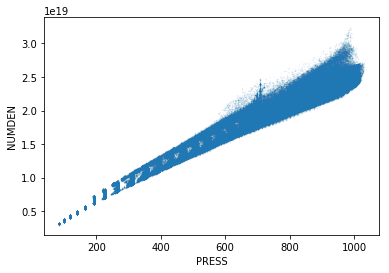

In [9]:
df_x.plot.scatter(x='PRESS', y='NUMDEN', s=0.1, alpha=0.1)

J values are highly correlated, obviously...

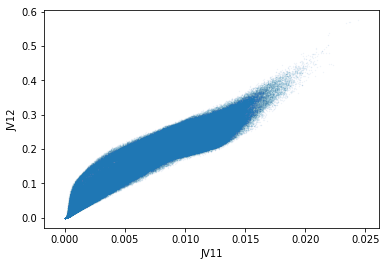

In [10]:
df_x.plot.scatter(x='JV11', y='JV12', s=0.1, alpha=0.1)

# Random Forest Regression

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
rf = RandomForestRegressor(n_estimators=15,
                           n_jobs=15, 
                           max_leaf_nodes=50000, criterion='mse', verbose=5)

In [13]:
%time rf.fit(df_x, df_y)

building tree 1 of 15
building tree 2 of 15
building tree 3 of 15
building tree 4 of 15
building tree 5 of 15
building tree 6 of 15
building tree 7 of 15
building tree 8 of 15
building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15building tree 14 of 15
building tree 15 of 15



[Parallel(n_jobs=15)]: Done   2 out of  15 | elapsed:  5.4min remaining: 35.1min
[Parallel(n_jobs=15)]: Done   6 out of  15 | elapsed:  5.4min remaining:  8.2min
[Parallel(n_jobs=15)]: Done  10 out of  15 | elapsed:  5.5min remaining:  2.8min


CPU times: user 1h 22min 18s, sys: 552 ms, total: 1h 22min 18s
Wall time: 5min 40s


[Parallel(n_jobs=15)]: Done  15 out of  15 | elapsed:  5.7min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=50000,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=15,
           oob_score=False, random_state=None, verbose=5, warm_start=False)

In [14]:
%time y_pred = rf.predict(df_x)
y_pred.shape

[Parallel(n_jobs=15)]: Done   2 out of  15 | elapsed:    1.0s remaining:    6.6s
[Parallel(n_jobs=15)]: Done   6 out of  15 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=15)]: Done  10 out of  15 | elapsed:    1.8s remaining:    0.9s


CPU times: user 13 s, sys: 2.04 s, total: 15 s
Wall time: 2.6 s


[Parallel(n_jobs=15)]: Done  15 out of  15 | elapsed:    2.2s finished


(1000000, 55)

O3 looks pretty good, but that's largely because the change per time step is too small. Will need to evaluate the whole time series.

CPU times: user 11.2 s, sys: 24 ms, total: 11.2 s
Wall time: 11.2 s


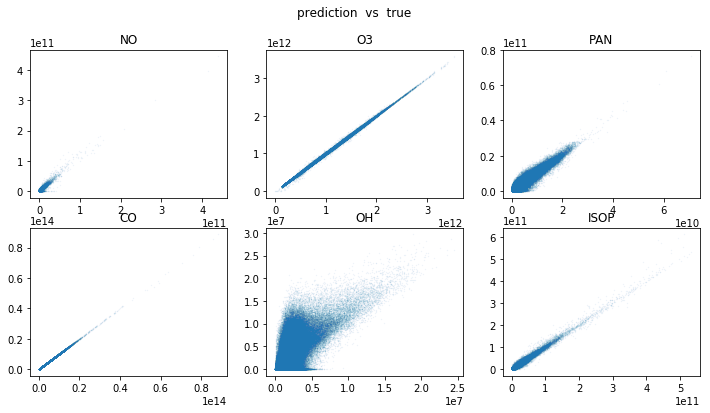

In [20]:
%%time
plt.figure(figsize=[12, 6])
for i, var in enumerate(['NO', 'O3', 'PAN', 'CO', 'OH', 'ISOP']):
    plt.subplot(2, 3, i+1)
    index = df_y.columns.get_loc(var)
    plt.scatter(y_pred[:,index], df_y.values[:,index], 
                s=0.1, alpha=0.1)
    plt.title(var)
plt.suptitle('prediction  vs  true')

CPU times: user 10 s, sys: 184 ms, total: 10.2 s
Wall time: 10.2 s


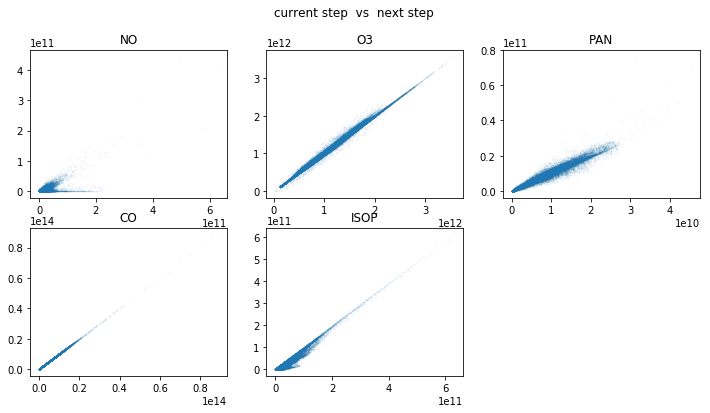

In [19]:
%%time
plt.figure(figsize=[12, 6])
for i, var in enumerate(['NO', 'O3', 'PAN', 'CO', 'ISOP']):
    plt.subplot(2, 3, i+1)
    plt.scatter(df_x[var], df_y[var], 
                s=0.1, alpha=0.1)
    plt.title(var)
plt.suptitle('current step  vs  next step')

# Hardware info

In [16]:
!lscpu

Architecture:          x86_64
CPU op-mode(s):        32-bit, 64-bit
Byte Order:            Little Endian
CPU(s):                16
On-line CPU(s) list:   0-15
Thread(s) per core:    2
Core(s) per socket:    8
Socket(s):             1
NUMA node(s):          1
Vendor ID:             GenuineIntel
CPU family:            6
Model:                 79
Model name:            Intel(R) Xeon(R) CPU E5-2686 v4 @ 2.30GHz
Stepping:              1
CPU MHz:               2434.406
CPU max MHz:           3000.0000
CPU min MHz:           1200.0000
BogoMIPS:              4600.10
Hypervisor vendor:     Xen
Virtualization type:   full
L1d cache:             32K
L1i cache:             32K
L2 cache:              256K
L3 cache:              46080K
NUMA node0 CPU(s):     0-15
Flags:                 fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology aperfmperf eagerfpu pni pclmulqdq ssse3 fma cx16 p